# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

# import our data

In [51]:
train=pd.read_csv('train.csv')

In [52]:
train

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322         -0.998807   
2            -0.995380         -0.967187         -0.978944         -0.996520   
3            -0.996091         -0.983403         -0.990675         -0.997099   
4            -0.998139         -0.980817         -0.990482         -0.998321   
...                ...               ...               ...               ...   
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.983185         -0.923527         -0.934724  ...   
1            -0.974914         -0.957686         -0.943068  ...   
2            -0.963668         -0.977469         -0.938692  ...   
3            -0.982750         -0.989302         -0.938692  ...   
4            -0.979672         -0.990441         -0.942469  ...   
...                ...               ...               ...  ...   
7347          0.043616          0.060410          0.210795  ...   
7348         -0.029456          0.080585          0.117440  ...   
7349         -0.098913          0.332584          0.043999  ...   
7350         -0.068200          0.319473          0.101702  ...   
7351         -0.038678          0.229430          0.269013  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.710304                    -0.112754   
1                           -0.861499                     0.053477   
2                           -0.760104                    -0.118559   
3                           -0.482845                    -0.036788   
4                           -0.699205                     0.123320   
...                               ...                          ...   
7347                        -0.880324                    -0.190437   
7348                        -0.680744                     0.064907   
7349                        -0.304029                     0.052806   
7350                        -0.344314                    -0.101360   
7351                        -0.740738                    -0.280088   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.030400                         -0.464761   
1                                -0.007435                         -0.732626   
2                                 0.177899                          0.100699   
3                                -0.012892                          0.640011   
4                                 0.122542                          0.693578   
...                                    ...                               ...   
7347                              0.829718                

In [53]:
test=pd.read_csv('test.csv')

In [54]:
test

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958         -0.986799   
2            -0.993819         -0.969926         -0.962748         -0.994403   
3            -0.994743         -0.973268         -0.967091         -0.995274   
4            -0.993852         -0.967445         -0.978295         -0.994111   
...                ...               ...               ...               ...   
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.925249         -0.674302         -0.894088  ...   
1            -0.968401         -0.945823         -0.894088  ...   
2            -0.970735         -0.963483         -0.939260  ...   
3            -0.974471         -0.968897         -0.938610  ...   
4            -0.965953         -0.977346         -0.938610  ...   
...                ...               ...               ...  ...   
2942         -0.148775         -0.232057          0.185361  ...   
2943         -0.030036         -0.270237          0.185361  ...   
2944         -0.133257         -0.347029          0.007471  ...   
2945         -0.279610         -0.289477          0.007471  ...   
2946         -0.218295         -0.229933         -0.111527  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.705974                     0.006462   
1                           -0.594944                    -0.083495   
2                           -0.640736                    -0.034956   
3                           -0.736124                    -0.017067   
4                           -0.846595                    -0.002223   
...                               ...                          ...   
2942                        -0.750809                    -0.337422   
2943                        -0.700274                    -0.736701   
2944                        -0.467179                    -0.181560   
2945                        -0.617737                     0.444558   
2946                        -0.436940                     0.598808   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.162920                         -0.825886   
1                                 0.017500                         -0.434375   
2                                 0.202302                          0.064103   
3                                 0.154438                          0.340134   
4                                -0.040046                          0.736715   
...                                    ...                               ...   
2942                              0.346295                

# Info About our data

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [56]:
train.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       7352.000000       7352.000000       7352.000000  ...   
mean          -0.526907         -0.606150         -0.468604  ...   
std            0.485942          0.414122          0.544547  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.978162         -0.980251         -0.936219  ...   
50%           -0.857328         -0.857143         -0.881637  ...   
75%           -0.066701         -0.265671         -0.017129  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                      7352.000000                      7352.000000   
mean                         -0.307009                        -0.625294   
std                           0.321011                         0.307584   
min                          -0.995357                        -0.999765   
25%                          -0.542602                        -0.845573   
50%                          -0.343685                        -0.711692   
75%                          -0.126979                        -0.503878   
max                           0.989538                         0.956845   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                  7352.000000                           7352.000000   
mean                      0.008684                              0.002186   
std                       0.336787                              0.448306   
min                      -0.976580                             -1.000000   
25%                      -0.121527                             -0.289549   
50%                       0.009509                              0.008943   
75%                       0.150865                              0.292861   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                       7352.000000                           7352.000000   
mean                           0.008726                             -0.005981   
std                            0.608303                              0.477975   
min                           -1.000000                             -1.000000   
25%                           -0.482273                             -0.376341   
50%                            0.008735                             -0.000368   
75%                            0.506187                              0.359368   
max                            0.998702                     

In [57]:
train.dtypes.value_counts()

float64    561
int64        1
object       1
dtype: int64

In [58]:
test.dtypes.value_counts()

float64    561
int64        1
object       1
dtype: int64

# Data cleaning

In [59]:
print('NaN/Null values in train are {}'.format(train.isnull().values.sum()))
print('NaN/Null values in test are {}'.format(test.isnull().values.sum()))

NaN/Null values in train are 0
NaN/Null values in test are 0


In [60]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [61]:
def show_basics(data):
    a = pd.DataFrame()
    a['Missing Value'] = train.isnull().sum()
    a['No. of unique Value'] = train.nunique()
    a['dtype'] = train.dtypes
    return a
show_basics(train)

Missing Value  No. of unique Value    dtype
tBodyAcc-mean()-X                 0                 7347  float64
tBodyAcc-mean()-Y                 0                 7352  float64
tBodyAcc-mean()-Z                 0                 7349  float64
tBodyAcc-std()-X                  0                 7349  float64
tBodyAcc-std()-Y                  0                 7351  float64
...                             ...                  ...      ...
angle(X,gravityMean)              0                 7352  float64
angle(Y,gravityMean)              0                 7352  float64
angle(Z,gravityMean)              0                 7352  float64
subject                           0                   21    int64
Activity                          0                    6   object

[563 rows x 3 columns]

In [62]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

# EDA

In [63]:
px.histogram(data_frame=train, x="subject", color="Activity",barmode='group')

In [64]:
data = train
fig = px.pie(train, names='Activity', title = 'Pieplot of Activities')
fig.show()

In [65]:
fig = px.box(data, y= 'subject', x= 'Activity', color= 'Activity', width= 1000, boxmode='overlay', title = 'Boxplot of Activities with respect to Subject')
fig.show()

we can notice that data is balanced

In [66]:
Acc=0
Gyro=0
other=0
for i in train.columns:
    if 'Acc'in i:
        Acc=Acc+1
    elif 'Gyro'in i:
        Gyro=Gyro+1
    else:
        other=other+1
px.bar(x=['Accelerometer ','Gyroscope ','other'],y=[Acc,Gyro,other],color=[Acc,Gyro,other], title = 'Sensors importance')   

The features selected for this database come from the accelerometer and gyroscope 3-axial raw signals

Acc=345
Geyro=213
other=5 most of data in Accelerometer so i will start DA with it
-------------------------------------------------------------------------------------------
In static activities ACC information will not be very useful.
In the dynamic activities ACC info will be significant.

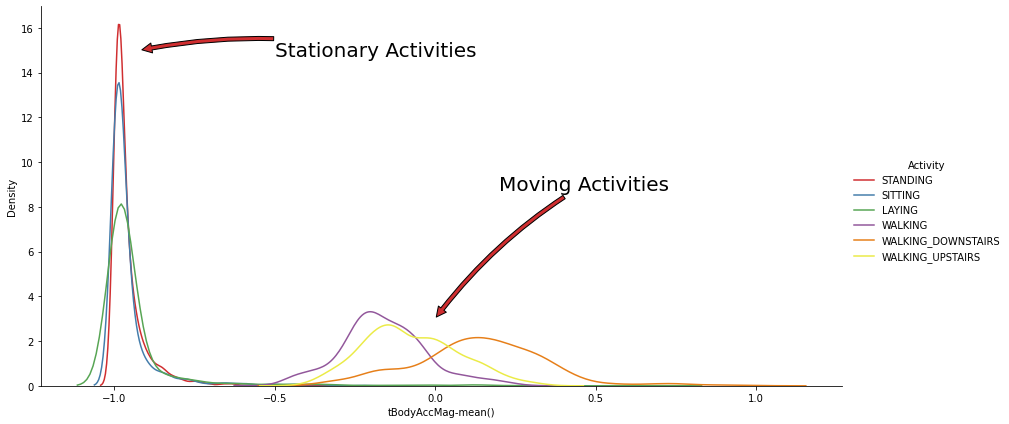

In [67]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.92,15), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

- Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.
--------------------------------------------------------------------------
if tBodyAccMag-mean() <= -0.5 then Activity is static
if tBodyAccMag-mean() >= -0.5 then Activity is dynamic

In [68]:
fig = px.box(data, y='tBodyAccMag-mean()', x="Activity",color="Activity",width=1000, title = 'Boxplot of tBodyAccMag-mean() feature across various Activities')
fig.show()

As we saw the activities were splitted into 2 groups as we wanted. Using boxplot, we can come with conditions to seperate static activities from dynamic activities.

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

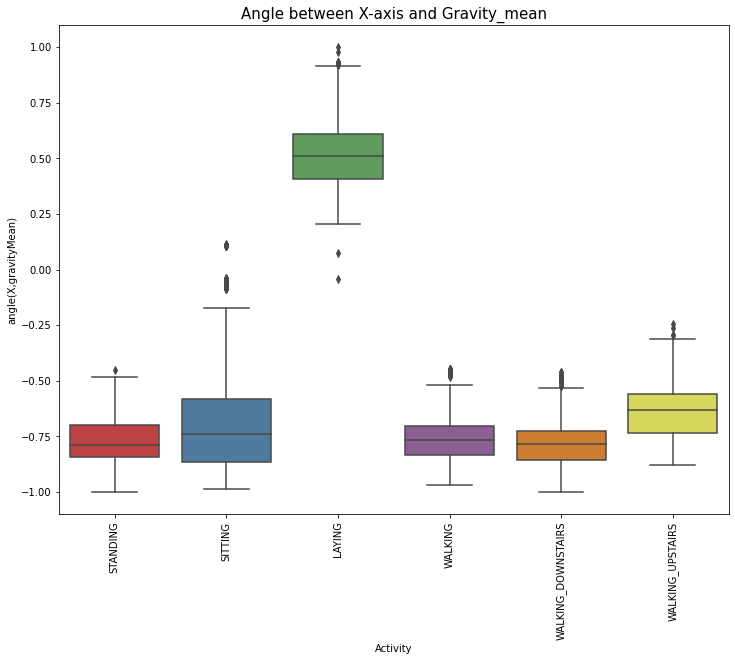

In [30]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=data)
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

In [69]:
fig = px.bar(data, x='angle(X,gravityMean)', y="Activity",color="Activity",width=1000,barmode='overlay', title = 'Angle between X-axis and Gravity_mean with respect to Activities')
fig.show()

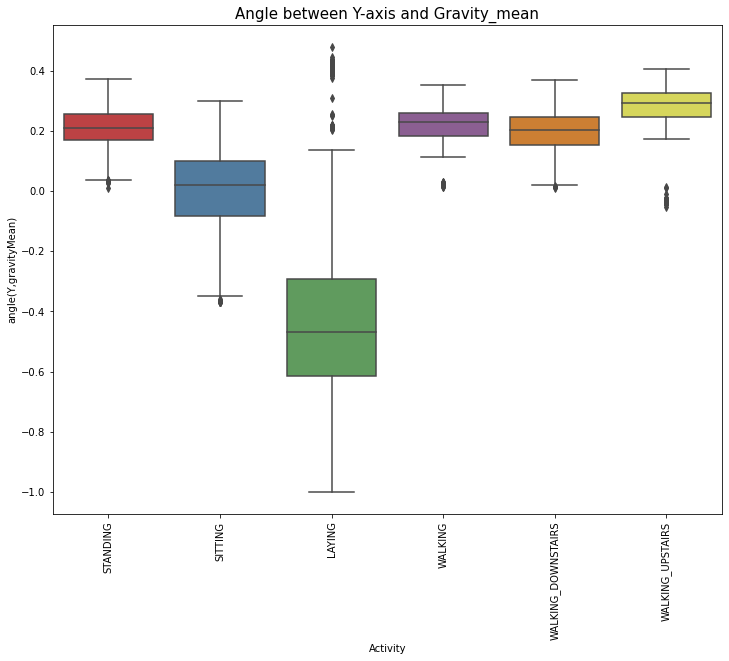

In [32]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data=data)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

- If angle(X,gravityMean) > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

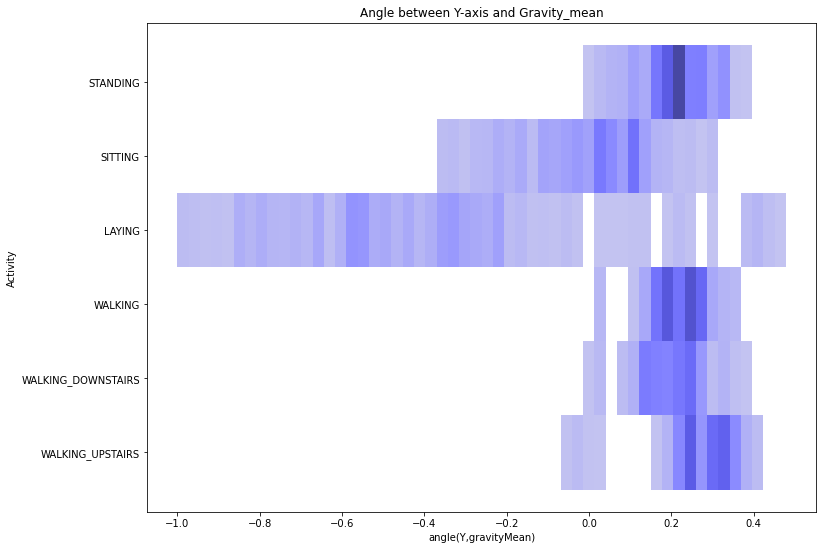

In [33]:
plt.figure(figsize=(12,9))
sns.histplot(data=data, x="angle(Y,gravityMean)", y = 'Activity', kde=True, color = 'Blue')
plt.title('Angle between Y-axis and Gravity_mean')
plt.show()

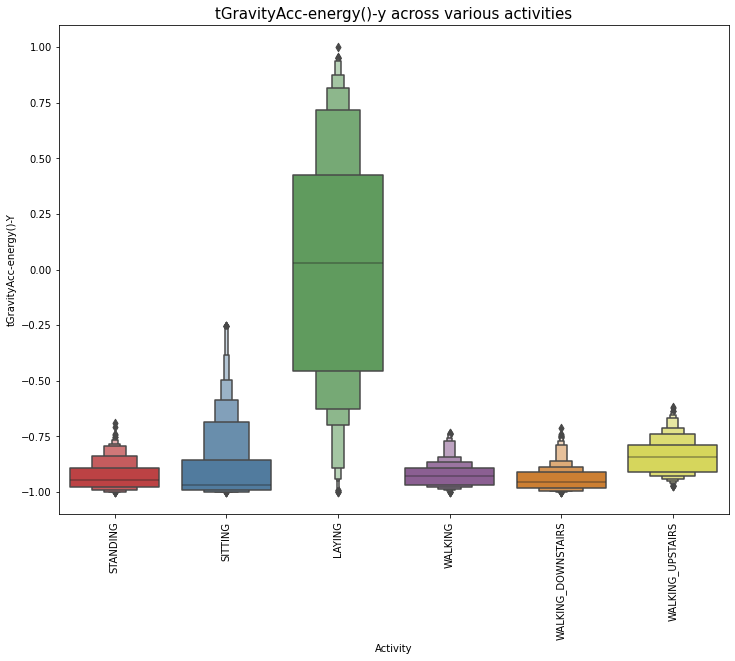

In [34]:
plt.figure(figsize=(12,9))
sns.boxenplot(x='Activity', y='tGravityAcc-energy()-Y', data=data)
plt.title('tGravityAcc-energy()-y across various activities', fontsize=15)
plt.xticks(rotation = 90)
plt.show()

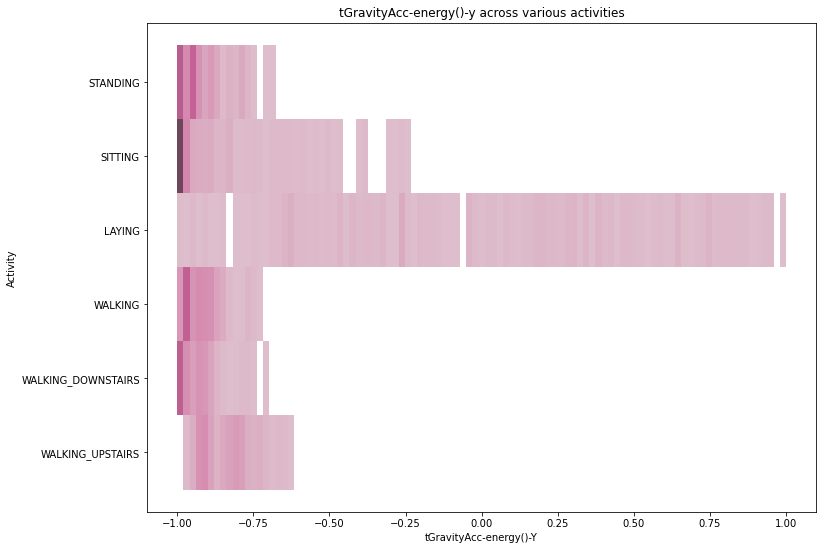

In [35]:
plt.figure(figsize=(12,9))
sns.histplot(data=data, x="tGravityAcc-energy()-Y", y = 'Activity', kde=True, color = '#d279a6')
plt.title('tGravityAcc-energy()-y across various activities')
plt.show()

From the boxplot and barplot we can observe that (tGravityAcc-energy()-Y) perfectly seperates LAYING from other activities.
- If tGravityAcc-energy()-Y > 0 then Activity is Laying.

In [70]:
fig = px.violin(data, y="fBodyAccJerk-entropy()-X", x="Activity", color="Activity", box = True, width = 1000)
fig.show()

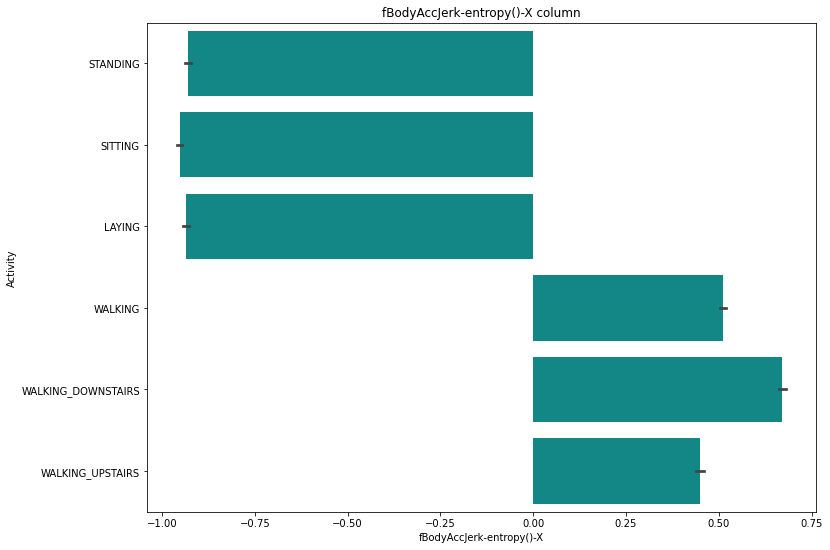

In [37]:
plt.figure(figsize=(12,9))
sns.barplot(data=data, x="fBodyAccJerk-entropy()-X", y = 'Activity', color = '#009999')
plt.title('fBodyAccJerk-entropy()-X column')
plt.show()

From the boxplot and barplot we can observe that (tGravityAcc-energy()-Y) perfectly seperates LAYING from other activities.

- If fBodyAccJerk-entropy()-X > 0 then Activity is static.
- If fBodyAccJerk-entropy()-X < 0 then Activity is dynamic

In [71]:
fig = px.box(data, y='fBodyGyro-entropy()-Z', x="Activity",color="Activity",width=1000,boxmode="overlay")
fig.show()

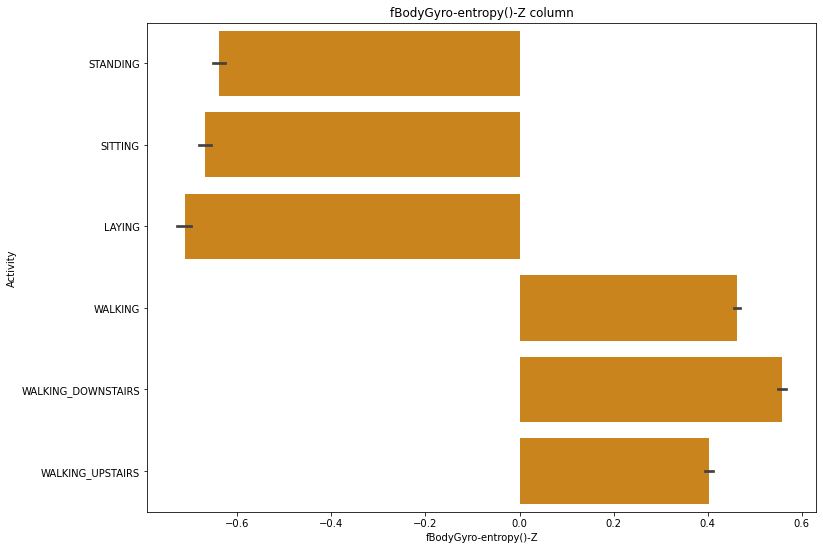

In [40]:
plt.figure(figsize=(12,9))
sns.barplot(data=data, x="fBodyGyro-entropy()-Z", y = 'Activity', color = '#e68a00')
plt.title('fBodyGyro-entropy()-Z column')
plt.show()

From the boxplot and barplot we can observe that (tGravityAcc-energy()-Y) perfectly seperates LAYING from other activities.

- If fBodyAccJerk-entropy()-X > 0 then Activity is static.
- If fBodyAccJerk-entropy()-X < 0 then Activity is dynamic

In [72]:
fig = px.box(data, y='tBodyAcc-max()-X', x="Activity",color="Activity",width=1000,boxmode="overlay")
fig.show()

In [16]:
from sklearn.manifold import TSNE
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.003s...
[t-SNE] Computed neighbors for 7352 samples in 1.789s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.126022
[t-SNE] KL divergence after 1000 iterations: 1.280826


<AxesSubplot:>

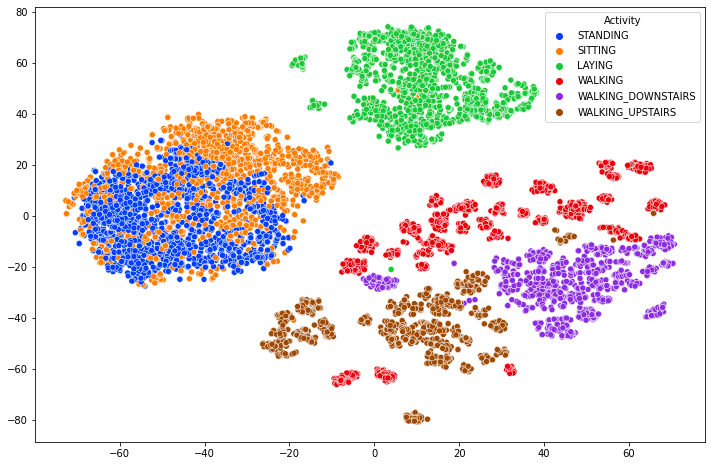

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

###  From those graphs we can conclude that:
    -we can not delete specific features to just reduce our dimensions.
    -we must be more care about stationary activities Accuracy

# Data preprocessing

## Encoding our data

In [6]:
from sklearn.preprocessing import LabelEncoder
model_trans = LabelEncoder()
train['Activity'] = model_trans.fit_transform(train['Activity'])
test['Activity'] = model_trans.fit_transform(test['Activity'])

In [7]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

Before any feature selection

### KNOWING THE STRONG CORRELATION BETWEEN FEATURES AND THE TARGET 

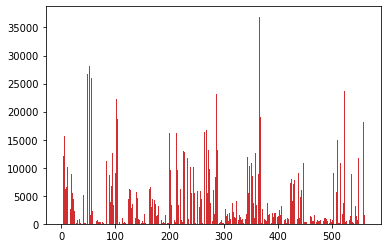

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 
    
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
   
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

- we need feature selection because we can not determine which feature is most correlated to our targets

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9883025027203483
0.9524940617577197


# After Feature Selection

## USING ANOVA && GridSearch

In [26]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
  
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_train.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_train, y_train)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

Best Mean Accuracy: 0.986
Best Config: {'anova__k': 552}


- it takes alot of Features so we will use RFE

## USING RFE >>>

### try to choose only 50 features

In [11]:
model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 50)
fit_train = rfe.fit(X_train, y_train)
fit_test = rfe.fit(X_test, y_test)

In [12]:
fit_train

RFE(estimator=LogisticRegression(), n_features_to_select=50)

In [13]:
features_train = fit_train.transform(X_train)
features_test = fit_test.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train , y_train)
print(lr.score(features_train, y_train))
print(lr.score(features_test, y_test))
features_50 =lr.score(features_test, y_test)

0.9732045701849836
0.9453681710213777


### trying 100 features

In [15]:
model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 100)
fit_train = rfe.fit(X_train, y_train)
fit_test = rfe.fit(X_test, y_test)

In [16]:
fit_train

RFE(estimator=LogisticRegression(), n_features_to_select=100)

In [17]:
features_train = fit_train.transform(X_train)
features_test = fit_test.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train , y_train)
print(lr.score(features_train, y_train))

0.9843579978237215


In [19]:
yhat = lr.predict(features_test)
print(lr.score(features_test, y_test))
features_100 =lr.score(features_test, y_test)

0.9586019681031558


### try 200 features 

In [20]:
model = LogisticRegression()
rfe = RFE(model,n_features_to_select= 200)
fit_train = rfe.fit(X_train, y_train)
fit_test = rfe.fit(X_test, y_test)

In [21]:
fit_train

RFE(estimator=LogisticRegression(), n_features_to_select=200)

In [22]:
features_train = fit_train.transform(X_train)
features_test = fit_test.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features_train , y_train)
print(lr.score(features_train, y_train))

0.9895266594124048


In [24]:
yhat = lr.predict(features_test)
print(lr.score(features_test, y_test))
features_200 =lr.score(features_test, y_test)

0.9630132337970818


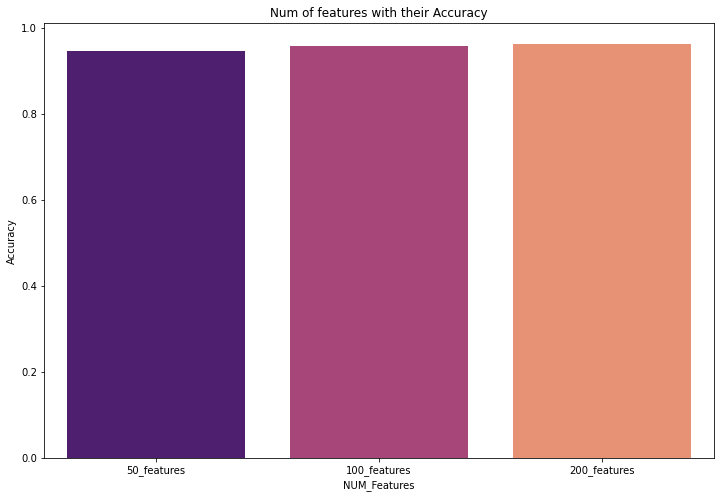

In [25]:
Acc = [features_50 , features_100 , features_200]
dataPerf = pd.DataFrame(data={'NUM_Features': ['50_features', '100_features', '200_features'] ,'Accuracy': Acc})

plt.figure(figsize=(12, 8))
sns.barplot(x="NUM_Features", y="Accuracy", data=dataPerf, palette="magma")
plt.title('Num of features with their Accuracy')
plt.show()

In [26]:
def classification_task( model,features_train, y_train ,features_test ,y_test, predic,model_name):
 
    perf_df=pd.DataFrame({'Train_Score':model.score(features_train, y_train),"Test_Score":model.score(features_test, y_test),
                       "Precision_Score":precision_score(y_test,predic, average = 'macro'),"Recall_Score":recall_score(y_test,predic, average = 'macro'),
                       "F1_Score":f1_score(y_test,predic, average = 'macro') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

# KNN

In [27]:
# Train KNN model on the scaled data 
KNN = KNeighborsClassifier()
# Fit the model
KNN.fit(features_train,y_train)
#predict x_test_scaled
pred_1 = KNN.predict(features_test)

In [28]:
Eval_KNN= classification_task(KNN,features_train, y_train ,features_test ,y_test,pred_1,"KNN" )
Eval_KNN

Train_Score  Test_Score  Precision_Score  Recall_Score  F1_Score  \
KNN     0.984902    0.921615         0.925505      0.918638  0.919958   

     accuracy  
KNN  0.921615

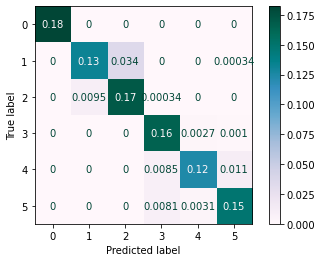

In [29]:
conf = confusion_matrix(y_test, pred_1 ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# Desicion Tree

In [30]:
# Train Decision Tree model on the scaled data 
Decision_Tree = DecisionTreeClassifier()
# Fit the model
Decision_Tree.fit(features_train,y_train)
#predict x_test_scaled
pred_ = Decision_Tree.predict(features_test)

In [31]:
Eval_dec= classification_task(Decision_Tree,features_train, y_train ,features_test ,y_test,pred_1,"Decision Tree" )
Eval_dec

Train_Score  Test_Score  Precision_Score  Recall_Score  \
Decision Tree          1.0    0.866983         0.925505      0.918638   

               F1_Score  accuracy  
Decision Tree  0.919958  0.921615

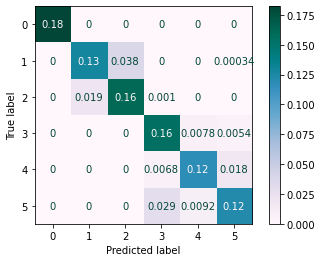

In [32]:
conf = confusion_matrix(y_test, pred_ ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# Random Forest

In [33]:
# Train Random forest model on the scaled data
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(features_train,y_train)
#predict x_test_scaled
pred_rand = Random_Forest.predict(features_test)

In [34]:
Eval_fores= classification_task(Random_Forest,features_train, y_train ,features_test ,y_test,pred_rand,"Random Forest" )
Eval_fores

Train_Score  Test_Score  Precision_Score  Recall_Score  \
Random Forest          1.0    0.920258         0.922031      0.918259   

               F1_Score  accuracy  
Random Forest  0.919466  0.920258

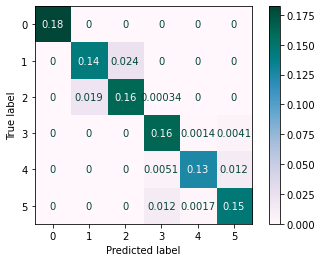

In [35]:
conf = confusion_matrix(y_test, pred_rand ,normalize="all",)
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# XGB

In [36]:
# Train XGB boost model on the scaled data
xgb = XGBClassifier()
# Fit the model
xgb.fit(features_train,y_train)
#predict x_test_scaled
pred = xgb.predict(features_test)

[17:53:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [37]:
Eval_XGB= classification_task(xgb,features_train, y_train ,features_test ,y_test,pred,"XGB" )
Eval_XGB

Train_Score  Test_Score  Precision_Score  Recall_Score  F1_Score  \
XGB          1.0    0.935188          0.93764      0.933298  0.934441   

     accuracy  
XGB  0.935188

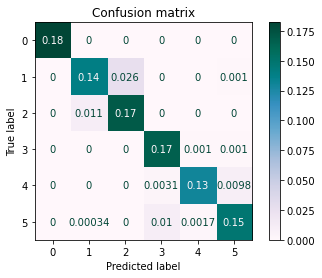

In [38]:
conf = confusion_matrix(y_test, pred ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)
plt.title('Confusion matrix')
plt.show()

In [39]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.84      0.88       491
           2       0.87      0.94      0.90       532
           3       0.93      0.99      0.96       496
           4       0.98      0.91      0.94       420
           5       0.93      0.92      0.92       471

    accuracy                           0.94      2947
   macro avg       0.94      0.93      0.93      2947
weighted avg       0.94      0.94      0.93      2947



#  Naive Bayes

In [40]:
# Train naive bayes boost model on the scaled data
clf = GaussianNB()
# Fit the model
clf.fit(features_train,y_train)
#predict x_test_scaled
pred_clf = clf.predict(features_test)

In [41]:
Eval_clf= classification_task(clf,features_train, y_train ,features_test ,y_test,pred_clf,"Naive Bayes" )
Eval_clf

Train_Score  Test_Score  Precision_Score  Recall_Score  F1_Score  \
Naive Bayes      0.89037    0.875127         0.890822      0.870234  0.869118   

             accuracy  
Naive Bayes  0.875127

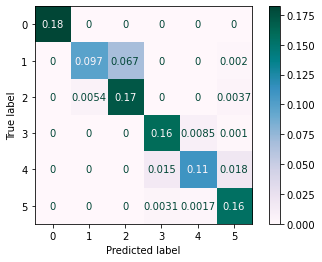

In [42]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_clf ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

# Logistic Regression

In [43]:
# Train the Logistic Regression model on the scaled data and print the model score
lr = LogisticRegression()
# Fit the model
lr.fit(features_train, y_train)
#predict x_test_scaled
pred_2 = lr.predict(features_test)

In [44]:
Eval_lr= classification_task(lr,features_train, y_train ,features_test ,y_test,pred_2,"logisitc regression" )
Eval_lr

Train_Score  Test_Score  Precision_Score  Recall_Score  \
logisitc regression     0.989527    0.963013         0.965397      0.962247   

                     F1_Score  accuracy  
logisitc regression  0.963048  0.963013

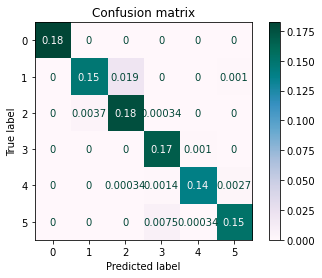

In [45]:
conf = confusion_matrix(y_test, pred_2 ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)
plt.title('Confusion matrix')
plt.show()

# SVM

In [46]:
# Train the svc model on the scaled data and print the model score
svc = SVC(random_state=0,C=0.7,kernel='rbf')
#fitting model
svc.fit(features_train, y_train)
#predict
pred_svc = svc.predict(features_test)

In [47]:
#calling the score function
Eval_svc= classification_task(svc,features_train, y_train ,features_test ,y_test,pred_svc,"SVC" )
Eval_svc

Train_Score  Test_Score  Precision_Score  Recall_Score  F1_Score  \
SVC      0.98055    0.957584         0.958923      0.956543  0.957381   

     accuracy  
SVC  0.957584

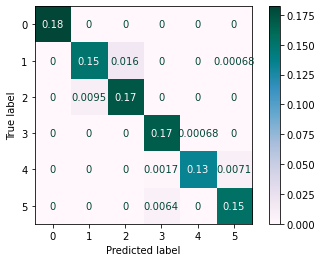

In [48]:
#creating confusion matrix to know the errors
conf = confusion_matrix(y_test, pred_svc ,normalize="all")
disp = ConfusionMatrixDisplay(conf).plot(cmap=plt.cm.PuBuGn)

In [49]:
#model comparison 
pd.concat([Eval_KNN, Eval_dec , Eval_fores , Eval_XGB ,Eval_clf , Eval_lr, Eval_svc]) 

Train_Score  Test_Score  Precision_Score  Recall_Score  \
KNN                     0.984902    0.921615         0.925505      0.918638   
Decision Tree           1.000000    0.866983         0.925505      0.918638   
Random Forest           1.000000    0.920258         0.922031      0.918259   
XGB                     1.000000    0.935188         0.937640      0.933298   
Naive Bayes             0.890370    0.875127         0.890822      0.870234   
logisitc regression     0.989527    0.963013         0.965397      0.962247   
SVC                     0.980550    0.957584         0.958923      0.956543   

                     F1_Score  accuracy  
KNN                  0.919958  0.921615  
Decision Tree        0.919958  0.921615  
Random Forest        0.919466  0.920258  
XGB                  0.934441  0.935188  
Naive Bayes          0.869118  0.875127  
logisitc regression  0.963048  0.963013  
SVC                  0.957381  0.957584

In [50]:
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.98      0.88      0.93       491
           2       0.90      0.98      0.94       532
           3       0.95      0.99      0.97       496
           4       0.99      0.97      0.98       420
           5       0.98      0.95      0.96       471

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947

